<a href="https://colab.research.google.com/github/vishnu4510/datascience/blob/main/casestudyin_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd







In [ ]:
file_path = '/House_Pricing.csv'
vj= pd.read_csv(file_path)
vj.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [42]:
vj.shape

(21613, 21)

In [43]:
vj.describe()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,21613.000000,21613.000000,21609.000000,21613.000000,21609.000000,21604.000000,21604.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.0,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,0.462602,0.453049,0.414023,0.465698,0.491150,0.448606,0.439098,0.197724,0.007542,0.950782,...,0.524048,0.428849,0.202893,0.382564,0.0,0.388575,0.647496,0.435357,0.482578,0.452320
std,0.290592,0.295069,0.237121,0.213526,0.240664,0.212907,0.270712,0.215996,0.086517,0.172230,...,0.250367,0.221431,0.297903,0.255421,0.0,0.270229,0.224518,0.196436,0.198717,0.258095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214370,0.166667,0.234170,0.375000,0.375000,0.289067,0.242481,0.000000,0.000000,1.000000,...,0.375000,0.260870,0.000000,0.156522,0.0,0.161616,0.503170,0.273443,0.334048,0.263153
50%,0.394376,0.416667,0.355593,0.375000,0.541667,0.411050,0.380754,0.200000,0.000000,1.000000,...,0.375000,0.368116,0.000000,0.347826,0.0,0.323232,0.666538,0.413744,0.441212,0.412208
75%,0.738246,0.666667,0.540502,0.625000,0.625000,0.573440,0.545489,0.400000,0.000000,1.000000,...,0.625000,0.556522,0.400000,0.556522,0.0,0.590909,0.838616,0.564066,0.600429,0.557892
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
vj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  float64
 1   Date House was Sold                        21613 non-null  float64
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  float64
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  float64
 9   No of Times Visited                        21613 non-null  float64
 10  Condition of the House

In [47]:
vj.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,0


In [48]:
vj.drop(columns=["No of Times Visited"],inplace=True,axis=1)

In [50]:
vj.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


In [51]:
numerical_columns = ['Sale Price', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)', 'Zipcode', 'Latitude', 'Longitude',
                     'Living Area after Renovation (in Sqft)']

In [53]:
for col in numerical_columns:
    vj[col].fillna(vj[col].median(), inplace=True)

In [55]:
vj.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0


In [57]:
vj.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [58]:
vj

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.720103,0.500000,0.139298,0.375,0.125000,0.225824,0.275205,0.0,0.0,0.50,0.375,0.257971,0.000000,0.521739,0.0,0.893939,0.288120,0.295685
1,0.647853,0.083333,0.439039,0.375,0.541667,0.578515,0.360610,0.4,0.0,0.50,0.375,0.544928,0.285714,0.556522,0.0,0.626263,0.395285,0.413332
2,0.568795,0.750000,0.099566,0.125,0.125000,0.121793,0.508567,0.0,0.0,0.50,0.125,0.139130,0.000000,0.713043,0.0,0.136364,0.710655,0.438352
3,0.251157,0.083333,0.501624,0.625,0.791667,0.423737,0.240335,0.0,0.0,0.25,0.375,0.220290,0.650000,0.434783,0.0,0.681818,0.294244,0.257238
4,0.197333,0.750000,0.412488,0.375,0.458333,0.352691,0.405566,0.0,0.0,0.50,0.625,0.402899,0.000000,0.243478,0.0,0.368687,0.428965,0.405288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.026467,0.333333,0.270251,0.375,0.625000,0.314631,0.032778,0.8,0.0,0.50,0.625,0.359420,0.000000,0.052174,0.0,0.515152,0.346295,0.050750
21609,0.666639,0.750000,0.308181,0.625,0.625000,0.512544,0.283950,0.4,0.0,0.50,0.625,0.585507,0.000000,0.008696,0.0,0.732323,0.438151,0.387366
21610,0.153783,0.250000,0.310173,0.125,0.041667,0.185226,0.044526,0.4,0.0,0.50,0.375,0.211594,0.000000,0.052174,0.0,0.722222,0.190141,0.080206
21611,0.029327,0.833333,0.308181,0.375,0.625000,0.332392,0.100211,0.4,0.0,0.50,0.625,0.379710,0.000000,0.095652,0.0,0.131313,0.309553,0.037619


In [60]:
print(vj['Condition of the House'].unique())

[0.5  0.25 0.75 0.   1.  ]


In [ ]:
# 1. Handle missing values

num_cols = data.select_dtypes(include='number').columns
impute

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7.129301e+09,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,NaN,...,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,NaN,...,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,NaN,...,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,NaN,...,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,NaN,...,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,NaN,...,8.0,1530.0,0.0,9.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,6.600060e+09,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,NaN,...,8.0,2310.0,0.0,4.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,1.523300e+09,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,NaN,...,7.0,1020.0,0.0,9.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,2.913101e+08,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,NaN,...,8.0,1600.0,0.0,14.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [ ]:


data = data.drop('No of Times Visited', axis=1)
data


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7.129301e+09,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,Fair,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,Fair,8.0,1530.0,0.0,9.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,6.600060e+09,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,Fair,8.0,2310.0,0.0,4.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,1.523300e+09,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,Fair,7.0,1020.0,0.0,9.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,2.913101e+08,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,Fair,8.0,1600.0,0.0,14.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


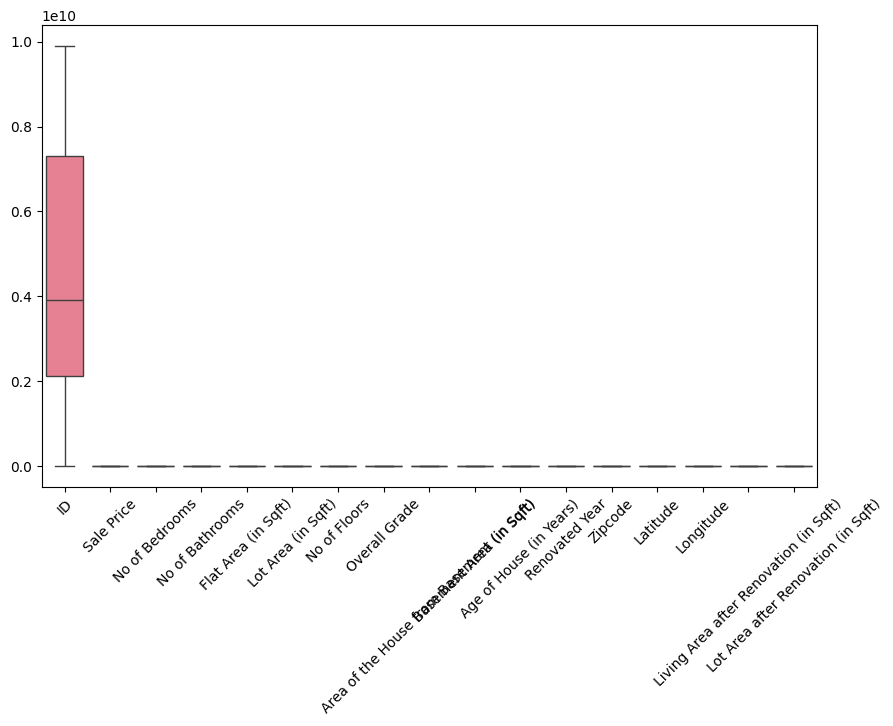

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=vj)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# prompt: outerlies

# Identify outliers using box plot
def detect_outliers_iqr(data):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Args:
      data: A pandas Series or DataFrame.

    Returns:
      A list of outlier values.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Example usage:
for col in vj.select_dtypes(include='number').columns:
  outliers = detect_outliers_iqr(vj[col])
  print(f"Outliers in {col}: {outliers}")

# You can then decide how to handle these outliers (e.g., remove, cap, or transform)


Outliers in ID: Series([], Name: ID, dtype: int64)
Outliers in Sale Price: 5        1230000.0
21       2000000.0
49       1350000.0
69       1330000.0
125      1450000.0
           ...    
21568    1700000.0
21576    3570000.0
21590    1220000.0
21597    1580000.0
21600    1540000.0
Name: Sale Price, Length: 1159, dtype: float64
Outliers in No of Bedrooms: 154      1
209      6
232      6
239      6
264      1
        ..
21375    6
21443    1
21519    1
21522    6
21552    1
Name: No of Bedrooms, Length: 546, dtype: int64
Outliers in No of Bathrooms: 5        4.50
75       4.00
235      4.00
270      4.75
300      5.00
         ... 
21551    4.50
21561    4.00
21576    4.50
21593    3.75
21600    3.75
Name: No of Bathrooms, Length: 571, dtype: float64
Outliers in Flat Area (in Sqft): 5        5420.0
70       4770.0
115      4380.0
153      5180.0
239      4410.0
          ...  
21551    4350.0
21561    4500.0
21576    4850.0
21590    4910.0
21600    4470.0
Name: Flat Area (in Sqft), Le

In [ ]:


# Example of capping outliers:
def cap_outliers(data, col, lower_bound, upper_bound):

  data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


for col in vj.select_dtypes(include='number').columns:
  outliers = detect_outliers_iqr(vj[col])
  if outliers.any():
    Q1 = vj[col].quantile(0.25)
    Q3 = vj[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cap_outliers(vj, col, lower_bound, upper_bound)



In [ ]:
# prompt: labelcoding

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

for col in vj.select_dtypes(include='object').columns:
  vj[col] = le.fit_transform(vj[col])

vj.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,6,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,4,...,7.0,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,4,...,7.0,2170.0,400,67,0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,9,180000.0,2.0,1.00,770.0,10000.0,1.0,0,4,...,6.0,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,1,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,4,...,7.0,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,9,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,4,...,8.0,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
# prompt: minmax scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = vj.select_dtypes(include='number').columns
vj[num_cols] = scaler.fit_transform(vj[num_cols])

vj.head()


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.720103,0.500000,0.139298,0.375,0.125000,0.225824,0.275205,0.0,0.0,1.0,...,0.375,0.257971,0.000000,0.521739,0.0,0.893939,0.568347,0.375089,0.288120,0.295685
1,0.647853,0.083333,0.439039,0.375,0.541667,0.578515,0.360610,0.4,0.0,1.0,...,0.375,0.544928,0.285714,0.556522,0.0,0.626263,0.908290,0.286328,0.395285,0.413332
2,0.568795,0.750000,0.099566,0.125,0.125000,0.121793,0.508567,0.0,0.0,1.0,...,0.125,0.139130,0.000000,0.713043,0.0,0.136364,0.935673,0.409449,0.710655,0.438352
3,0.251157,0.083333,0.501624,0.625,0.791667,0.423737,0.240335,0.0,0.0,1.0,...,0.375,0.220290,0.650000,0.434783,0.0,0.681818,0.583902,0.180387,0.294244,0.257238
4,0.197333,0.750000,0.412488,0.375,0.458333,0.352691,0.405566,0.0,0.0,1.0,...,0.625,0.402899,0.000000,0.243478,0.0,0.368687,0.739453,0.678597,0.428965,0.405288
